![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [181]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with the dayfirst parameter to correctly parse dates
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}, dayfirst=True)
crimes.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST
5,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST
6,221515929,2022-10-10,2020-04-01,1200,N Hollywood,THEFT OF IDENTITY,33,M,W,NaN,Invest Cont,5700 CARTWRIGHT AV
7,231906599,2023-03-03,2020-01-14,1335,Mission,THEFT OF IDENTITY,35,M,O,NaN,Invest Cont,14500 WILLOWGREEN LN
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV
9,231506571,2023-03-03,2020-07-15,1700,N Hollywood,OTHER MISCELLANEOUS CRIME,21,F,W,VERBAL THREAT,Invest Cont,12300 EMELITA ST


# ***```Data Cleaning```***

## Check for null values in each column

In [184]:
null_summary = crimes.isnull().sum()
print("Null values per column:\n", null_summary)

Null values per column:
 DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64


In [185]:
# Drop rows where critical columns have null values
crimes.dropna(subset=['TIME OCC', 'AREA NAME'], inplace = True)

## Dealing with Null Values in respective column

In [187]:
crimes['Vict Sex'] = crimes['Vict Sex'].fillna('X')
crimes['Vict Descent'] = crimes['Vict Descent'].fillna('X')
crimes['Weapon Desc'] = crimes['Weapon Desc'].fillna('No Weapon')

## Standardize Column Names

In [210]:
# Standardize column names
crimes.columns = crimes.columns.str.lower().str.replace(" ", "_")
print("Updated column names: \n", crimes.columns)

Updated column names: 
 Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area_name',
       'crm_cd_desc', 'vict_age', 'vict_sex', 'vict_descent', 'weapon_desc',
       'status_desc', 'location', 'hour', 'victim_age_group'],
      dtype='object')


## Handling Data Types

In [212]:
print(crimes.dtypes)

# Convert dates to datetime format if not already done
crimes['date_rptd'] = pd.to_datetime(crimes['date_rptd'], errors='coerce')
crimes['date_occ'] = pd.to_datetime(crimes['date_occ'], errors='coerce')

# Check data types
print("Updated Datatypes: \n", crimes.dtypes)

dr_no                        int64
date_rptd           datetime64[ns]
date_occ            datetime64[ns]
time_occ                     int32
area_name                   object
crm_cd_desc                 object
vict_age                     int64
vict_sex                    object
vict_descent                object
weapon_desc                 object
status_desc                 object
location                    object
hour                         int32
victim_age_group          category
dtype: object
Updated Datatypes: 
 dr_no                        int64
date_rptd           datetime64[ns]
date_occ            datetime64[ns]
time_occ                     int32
area_name                   object
crm_cd_desc                 object
vict_age                     int64
vict_sex                    object
vict_descent                object
weapon_desc                 object
status_desc                 object
location                    object
hour                         int32
victim_age_group    

## Removing Duplicates (if any)

In [214]:
# Remove duplicates
crimes.drop_duplicates(inplace=True)

## Handling Text Cleanups

In [216]:
# Strip whitespace from text columns e.g the "location" column
text_columns = ['area_name', 'crm_cd_desc', 'weapon_desc', 'status_desc', 'location']
crimes[text_columns] = crimes[text_columns].apply(lambda x: x.str.strip())

In [218]:
crimes.head(100)

,dr_no,date_rptd,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,weapon_desc,status_desc,location,hour,victim_age_group
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,No Weapon,Invest Cont,2500 S SYCAMORE AV,11,26-34
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,No Weapon,Invest Cont,3300 SAN MARINO ST,16,55-64
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,No Weapon,Invest Cont,1900 TRANSIENT,12,26-34
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,No Weapon,Invest Cont,6200 4TH AV,6,35-44
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,No Weapon,Invest Cont,1200 W 7TH ST,9,65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,220912439,2022-08-10,2020-12-27,900,Van Nuys,INTIMATE PARTNER - AGGRAVATED ASSAULT,48,M,W,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,14800 OTSEGO ST,9,45-54
96,221513720,2022-08-17,2020-11-08,1010,N Hollywood,THEFT OF IDENTITY,27,M,W,No Weapon,Invest Cont,11700 VANOWEN ST,10,26-34
97,220713064,2022-08-19,2020-02-28,1020,Wilshire,THEFT OF IDENTITY,31,F,B,No Weapon,Invest Cont,5100 W 20TH ST,10,26-34
98,221218637,2022-07-12,2020-08-01,1200,77th Street,BURGLARY,38,M,W,No Weapon,Invest Cont,5000 DENKER AV,12,35-44


# ***```Key Findings```***

### 1. Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

In [220]:
# Convert TIME_OCC to integer format for easier processing
crimes['time_occ'] = crimes['time_occ'].astype(int)

# Extract the hour by dividing by 100
crimes['hour'] = crimes['time_occ'] // 100

# Find the hour with the highest frequency of crimes
peak_crime_hour = crimes['hour'].value_counts().idxmax()
print("Peak Crime Hour:", peak_crime_hour)


Peak Crime Hour: 12


### 2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.


In [222]:
# 2. Find the area with the largest frequency of night crimes (10pm to 3:59am)

# Filter for night crimes between 10 PM and 3:59 AM
night_crimes = crimes[(crimes['hour'] >= 22) | (crimes['hour'] <= 3)]

# Find the area with the highest frequency of night crimes
peak_night_crime_location = night_crimes['area_name'].value_counts().idxmax()
print("Peak Night Crime Location:", peak_night_crime_location)


Peak Night Crime Location: Central


### 3. Identify the number of crimes committed against victims of different age groups. 

#### Save as a pandas Series called victim_ages, with age group labels 
##### "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

In [224]:
# Define age group bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create a new column for age groups
crimes['victim_age_group'] = pd.cut(crimes['vict_age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of crimes in each age group
victim_ages = crimes['victim_age_group'].value_counts().sort_index()
print("Victim Ages:\n", victim_ages)


Victim Ages:
 victim_age_group
0-17      3624
18-25    24366
26-34    47288
35-44    43759
45-54    29247
55-64    21116
65+      16315
Name: count, dtype: int64


# ***```Additional Insights```***

### Average victim age by crime type

In [228]:
avg_age_crime_type = crimes.groupby("crm_cd_desc")["vict_age"].mean().sort_values(ascending=False)
print(avg_age_crime_type)

crm_cd_desc
PURSE SNATCHING - ATTEMPT                                   62.500000
DISRUPT SCHOOL                                              62.000000
GRAND THEFT / INSURANCE FRAUD                               62.000000
DISHONEST EMPLOYEE ATTEMPTED THEFT                          60.000000
DOCUMENT FORGERY / STOLEN FELONY                            53.696011
                                                              ...    
TILL TAP - GRAND THEFT ($950.01 & OVER)                     23.000000
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE                   22.413793
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)    21.500000
CONTRIBUTING                                                15.437500
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    10.906445
Name: vict_age, Length: 104, dtype: float64


### Crime Trends by Time of Day

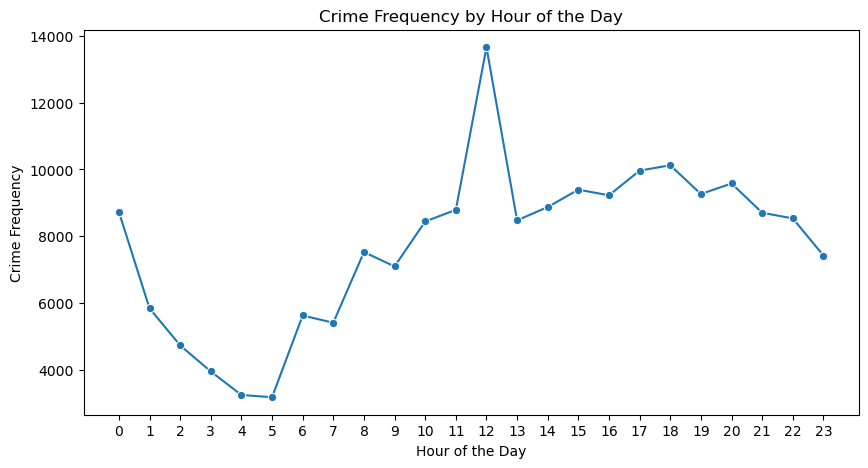

In [236]:
# Convert TIME OCC to integer hour format for easier grouping
crimes["hour"] = crimes["time_occ"].astype(int) // 100

# Plot frequency of crimes by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=crimes["hour"].value_counts().index, y=crimes["hour"].value_counts().values, marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Frequency")
plt.title("Crime Frequency by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()

### Victim Demographics

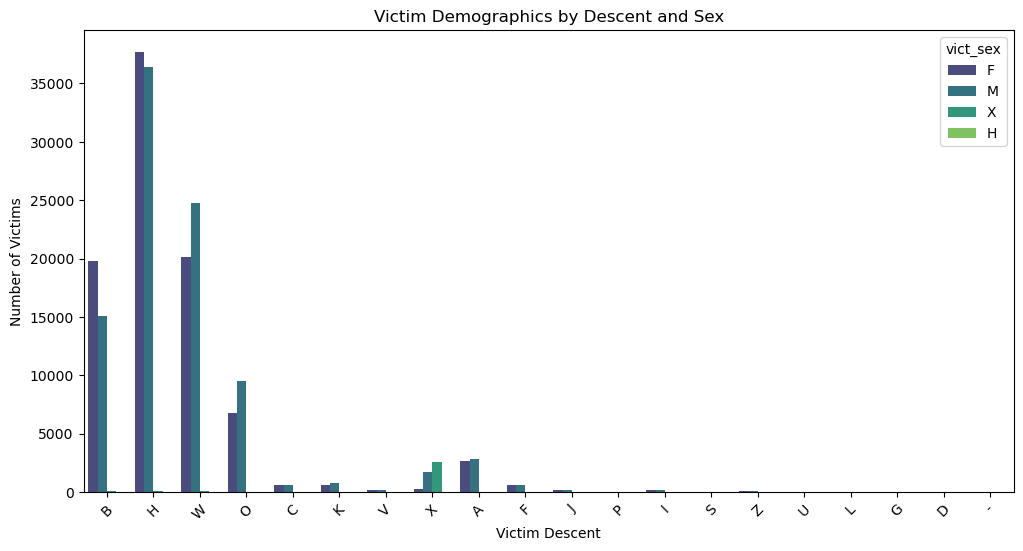

In [238]:
# Plot count of victims by sex and descent
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x="vict_descent", hue="vict_sex", palette="viridis")
plt.xlabel("Victim Descent")
plt.ylabel("Number of Victims")
plt.title("Victim Demographics by Descent and Sex")
plt.xticks(rotation=45)
plt.show()

### Weapon Use in Crimes


C:\Users\HP\AppData\Local\Temp\ipykernel_13032\238152629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weapons.values, y=top_weapons.index, palette="magma")


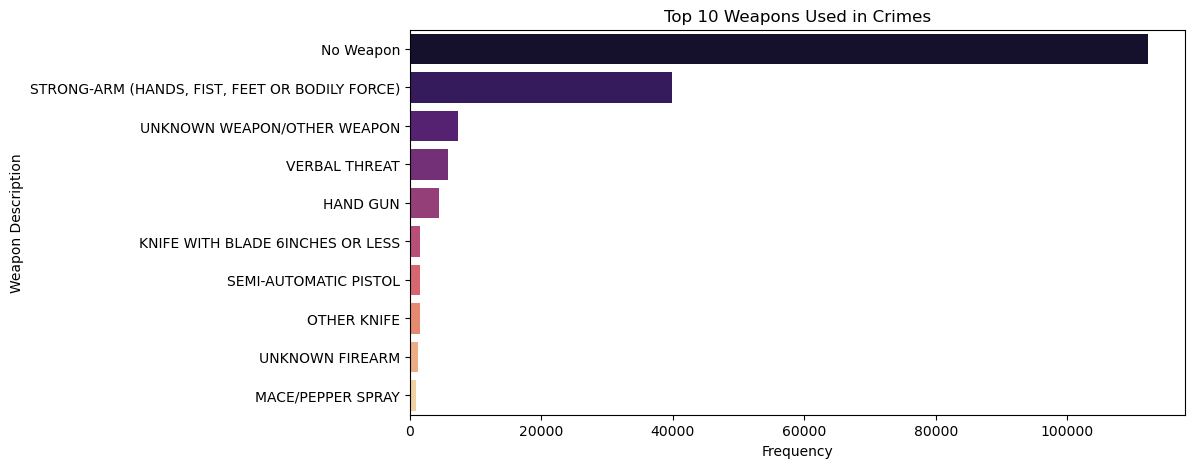

In [240]:
# Top 10 weapons used
top_weapons = crimes["weapon_desc"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_weapons.values, y=top_weapons.index, palette="magma")
plt.xlabel("Frequency")
plt.ylabel("Weapon Description")
plt.title("Top 10 Weapons Used in Crimes")
plt.show()

### Victim Age Distribution

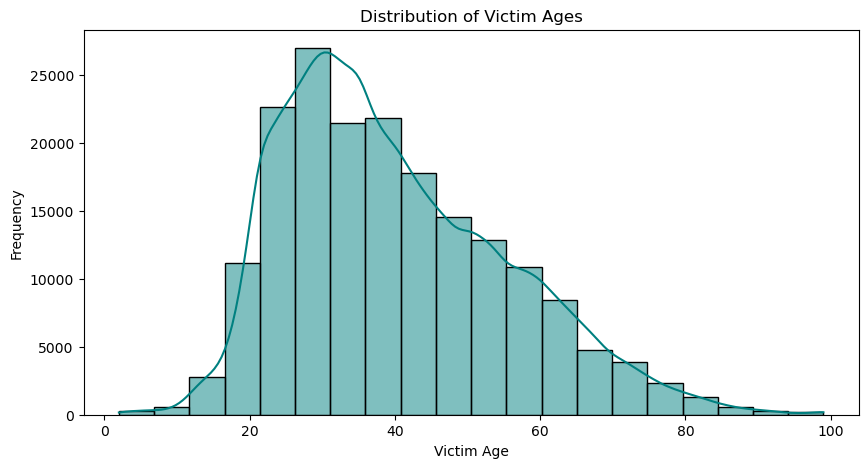

In [242]:
# Plot distribution of victim ages
plt.figure(figsize=(10, 5))
sns.histplot(crimes["vict_age"].dropna(), bins=20, kde=True, color="teal")
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.title("Distribution of Victim Ages")
plt.show()


### Percentage of Violent Crimes

In [244]:
# Filtering for crimes involving weapons
violent_crimes = crimes[crimes["weapon_desc"].notna()]

# Calculate percentage of violent crimes
violent_crime_percentage = (len(violent_crimes) / len(crimes)) * 100
print(f"Percentage of Violent Crimes: {violent_crime_percentage:.2f}%")

Percentage of Violent Crimes: 100.00%


### Proportion of Night Crimes

In [248]:
# Define night hours and calculate their frequency
night_crimes = crimes[(crimes["hour"] >= 22) | (crimes["hour"] < 4)]
night_crime_percentage = (len(night_crimes) / len(crimes)) * 100
print(f"Percentage of Night Crimes: {night_crime_percentage:.2f}%")

Percentage of Night Crimes: 21.10%


### Gender Based Crime Victimization Rate

Gender-Based Victimization Rate (%):
vict_sex
M    50.081038
F    48.382737
X     1.520071
H     0.016154
Name: proportion, dtype: float64


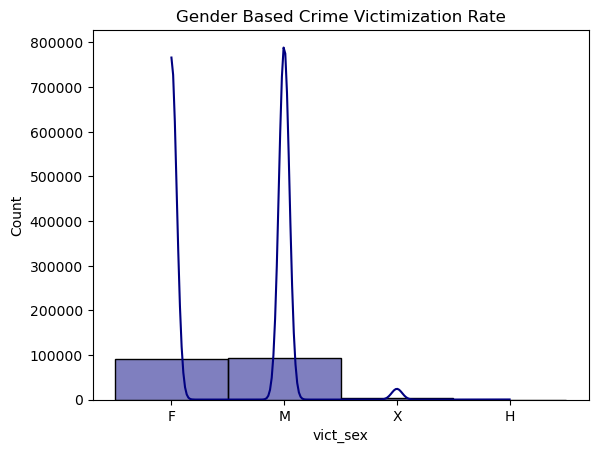

In [285]:
# Victim gender distribution
victim_gender_distribution = crimes["vict_sex"].value_counts(normalize=True) * 100
print("Gender-Based Victimization Rate (%):")
print(victim_gender_distribution)

sns.histplot(crimes["vict_sex"].dropna(), bins=20, kde=True, color="navy")
plt.title("Gender Based Crime Victimization Rate")
plt.show()

### Frequency of Top 5 Crime Types Over Time


<Figure size 1200x600 with 0 Axes>

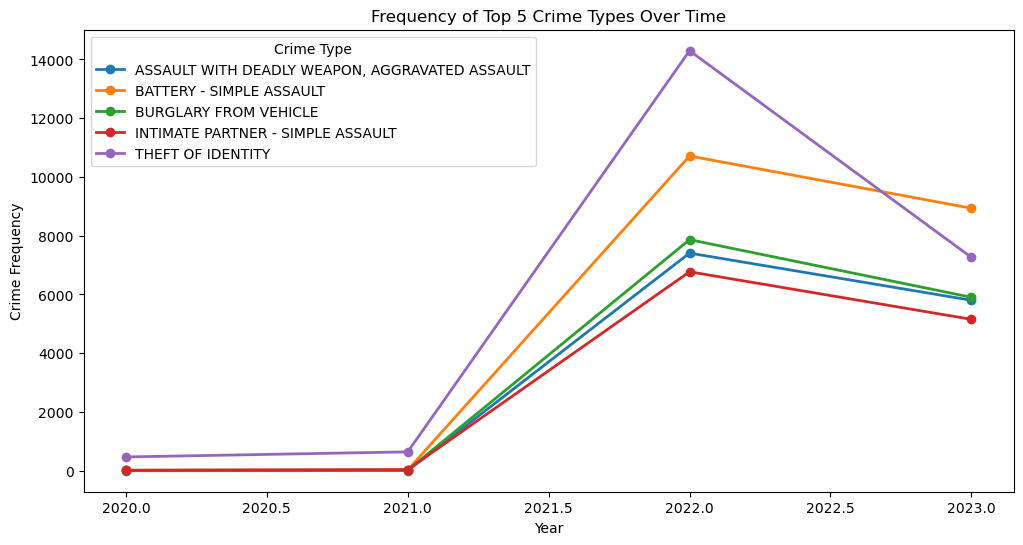

In [270]:
# Identify top 5 crime types
top_5_crimes = crimes["crm_cd_desc"].value_counts().head(5).index
top_5_crime_data = crimes[crimes["crm_cd_desc"].isin(top_5_crimes)]

# Group by year and crime type to observe trend
top_5_crime_trend = top_5_crime_data.groupby([top_5_crime_data["date_occ"].dt.year, "crm_cd_desc"]).size().unstack()

# Plot the trend
plt.figure(figsize=(12, 6))
top_5_crime_trend.plot(marker="o", linewidth=2, figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Crime Frequency")
plt.title("Frequency of Top 5 Crime Types Over Time")
plt.legend(title="Crime Type")
plt.show()
